#### Roll No: 31251

# Assignment-5
### Data Analytics II
#### 1.	Implement	logistic	regression	using	Python/R	to	perform	classification	on Social_Network_Ads.csv dataset.
#### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df['Gender'].replace(['Female','Male'], [0,1], inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


Text(0.5, 1.0, 'Age')

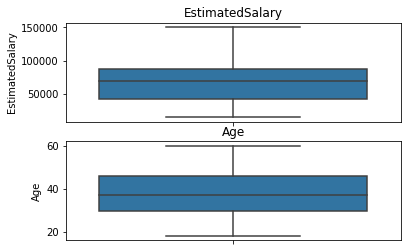

In [7]:
fig, axes = plt.subplots(2)
sns.boxplot(y=df['EstimatedSalary'], ax=axes[0]).set_title('EstimatedSalary')
sns.boxplot(y=df['Age'], ax=axes[1]).set_title('Age')

#### Observation: There are no outliers in the dataset.

In [8]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [9]:
# Assigning dependent & independent variables
X = df.iloc[:, 2:4].values
y = df['Purchased']

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Training the Logistic Regression model on the Training Set
from sklearn import linear_model
lm = linear_model.LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Predicting the Test set results
y_pred = lm.predict(X_test)

In [14]:
y_test

283    1
183    0
221    1
243    1
272    1
      ..
292    1
88     0
41     0
367    1
0      0
Name: Purchased, Length: 80, dtype: int64

In [15]:
# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))

Accuracy :  0.825
Precision Score :  0.7222222222222222
Recall Score :  0.5909090909090909


<AxesSubplot:>

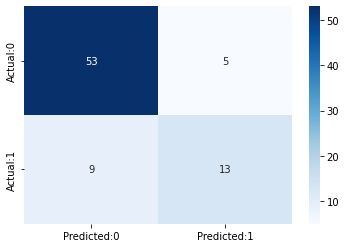

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot = True, cmap = plt.cm.Blues)

In [17]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

accuracy = (TP+TN)/(TP+FN+TN+FP)
error_rate = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("Accuracy : ", accuracy)
print("Error Rate : ", error_rate)
print("Precision : ", precision)
print("Recall : ", recall)

Accuracy :  0.825
Error Rate :  0.17500000000000004
Precision :  0.7222222222222222
Recall :  0.5909090909090909
